# Imports and settings

In [117]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [118]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Initial Data loading and understanding

In [119]:
df = pd.read_csv('../Data Collection/Datasets/nhatot.com/raw/nhatot.csv')
# Select only the specific columns you're interested in
df.head()

,Description,Location,Price,Price per m²,Space,Title
0,"6 PN • Nhà ngõ, hẻm",Quận Thanh Xuân • 2 ngày trước,"13,9 tỷ",278 tr/m²,50 m²,LÊ TRỌNG TẤN_THANH XUÂN_50M_5 TẦG PHÂN LÔ_LÔ G...
1,"3 PN • Nhà ngõ, hẻm",Quận Hoàng Mai • 2 ngày trước,"13,9 tỷ",278 tr/m²,50 m²,BÁN NHÀ THANH LÂN – NHÀ ĐẸP 5 TẦN5 – NGÕ NÔNG ...
2,1 PN • Chung cư,Huyện Gia Lâm • 2 ngày trước,"13,9 tỷ",278 tr/m²,50 m²,BÁN NHANH CĂN 1N +GIÁ 2.250 TR FULL NỘI THẤT T...
3,"nhiều hơn 10 PN • Nhà ngõ, hẻm",Quận Nam Từ Liêm • 2 ngày trước,"13,9 tỷ",278 tr/m²,50 m²,CHDV MỄ TRÌ_62M2_7T TM_17P KK_DÒNG TIỀN 95TR/T...
4,"4 PN • Nhà ngõ, hẻm",Quận Nam Từ Liêm • 2 ngày trước,"13,9 tỷ",278 tr/m²,50 m²,MỸ ĐÌNH_DÂN XÂY_39M 4T_50M Ô TÔ_2 THOÁNG_ GẦN ...


In [120]:
print("\nBasic information:")
df.info()


Basic information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3875 entries, 0 to 3874
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Description   3875 non-null   object
 1   Location      3875 non-null   object
 2   Price         3875 non-null   object
 3   Price per m²  3875 non-null   object
 4   Space         3875 non-null   object
 5   Title         3875 non-null   object
dtypes: object(6)
memory usage: 181.8+ KB


In [121]:
print("\nSummary statistics:")
df.describe()


Summary statistics:


,Description,Location,Price,Price per m²,Space,Title
count,3875,3875,3875,3875,3875,3875
unique,246,396,141,144,63,2685
top,"3 PN • Nhà ngõ, hẻm",Quận Hà Đông • hôm qua,"13,9 tỷ",169 tr/m²,50 m²,CẦN BÁN NHÀ THẠCH BÀN LONG BIÊN HÀ NỘI.
freq,723,152,100,80,280,11


## Duplicate

In [122]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 4


In [123]:
if duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New number of rows: {len(df)}")

Duplicates removed. New number of rows: 3871


## Convert Description and Location into Bedrooms and Date

In [124]:
# Extract bedrooms and property type from Description
def extract_from_description(desc_str):
    """
    Extract number of bedrooms and property type from description string
    Expected format: "X PN • Property Type"
    """
    if pd.isna(desc_str):
        return np.nan, None
    
    desc_str = str(desc_str).strip()
    
    # Extract number of bedrooms (PN)
    bedroom_match = re.search(r'(\d+)\s*PN', desc_str)
    bedrooms = int(bedroom_match.group(1)) if bedroom_match else np.nan
    
    # Extract property type (after "•")
    property_parts = desc_str.split('•')
    property_type = property_parts[1].strip() if len(property_parts) > 1 else None
    
    return bedrooms, property_type

# Extract district and date posted from Location
def extract_from_location(location_str):
    """
    Extract district and posting date from location string
    Expected format: "District • Date"
    """
    if pd.isna(location_str):
        return None, None
    
    location_str = str(location_str).strip()
    parts = location_str.split('•')
    
    district = parts[0].strip() if len(parts) >= 1 else None
    date_posted = parts[1].strip() if len(parts) > 1 else None
    
    return district, date_posted

# Apply the extraction functions
df['bedrooms'], df['property_type'] = zip(*df['Description'].apply(extract_from_description))
df['district_name'], df['date_posted'] = zip(*df['Location'].apply(extract_from_location))

# Display the results
print("\nExtracted fields from Description and Location:")
print(df[['Description', 'bedrooms', 'property_type', 
          'Location', 'district_name', 'date_posted']].head(10))


Extracted fields from Description and Location:
                      Description  bedrooms property_type  \
0             6 PN • Nhà ngõ, hẻm      6.00  Nhà ngõ, hẻm   
1             3 PN • Nhà ngõ, hẻm      3.00  Nhà ngõ, hẻm   
2                 1 PN • Chung cư      1.00      Chung cư   
3  nhiều hơn 10 PN • Nhà ngõ, hẻm     10.00  Nhà ngõ, hẻm   
4             4 PN • Nhà ngõ, hẻm      4.00  Nhà ngõ, hẻm   
5          Đất thổ cư • Ngang 5 m       NaN     Ngang 5 m   
6                 2 PN • Chung cư      2.00      Chung cư   
7                 3 PN • Chung cư      3.00      Chung cư   
8             2 PN • Nhà ngõ, hẻm      2.00  Nhà ngõ, hẻm   
9             3 PN • Nhà ngõ, hẻm      3.00  Nhà ngõ, hẻm   

                           Location      district_name   date_posted  
0    Quận Thanh Xuân • 2 ngày trước    Quận Thanh Xuân  2 ngày trước  
1     Quận Hoàng Mai • 2 ngày trước     Quận Hoàng Mai  2 ngày trước  
2      Huyện Gia Lâm • 2 ngày trước      Huyện Gia Lâm  2 ngày trư

## Missing value

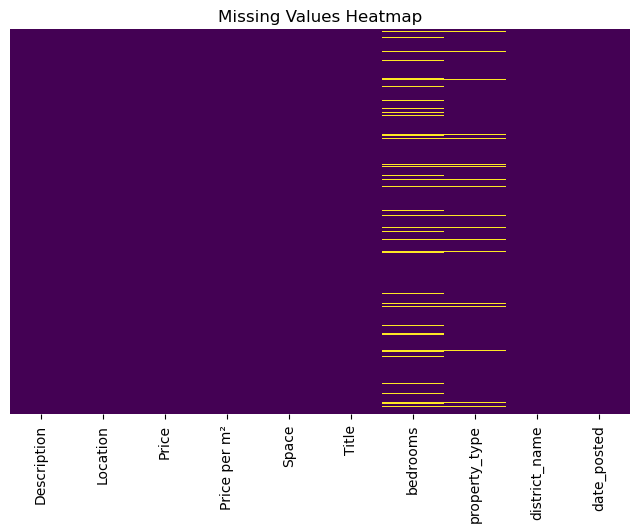

In [125]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [126]:
# Re-check for missing values in extracted components from Description and Location
print("\nMissing values in extracted components after processing:")
missing_components_updated = df[['bedrooms', 'property_type', 'district_name', 'date_posted']].isnull().sum()
print(missing_components_updated)

# Display rows where bedrooms could not be extracted
print("\nRows where 'bedrooms' could not be extracted (first 5):")
print(df[df['bedrooms'].isnull()][['Description', 'Title']].head())

# Display rows where property_type could not be extracted
print("\nRows where 'property_type' could not be extracted (first 5):")
print(df[df['property_type'].isnull()][['Description', 'Title']].head())

# Display rows where district_name could not be extracted
print("\nRows where 'district_name' could not be extracted (first 5):")
print(df[df['district_name'].isnull()][['Location', 'Title']].head())

# Display rows where date_posted could not be extracted
print("\nRows where 'date_posted' could not be extracted (first 5):")
print(df[df['date_posted'].isnull()][['Location', 'Title']].head())

# Calculate percentage of complete extraction for each field
print("\nPercentage of rows with successful extraction:")
total_rows = len(df)
print(f"bedrooms: {(total_rows - df['bedrooms'].isnull().sum()) / total_rows * 100:.2f}%")
print(f"property_type: {(total_rows - df['property_type'].isnull().sum()) / total_rows * 100:.2f}%")
print(f"district_name: {(total_rows - df['district_name'].isnull().sum()) / total_rows * 100:.2f}%")
print(f"date_posted: {(total_rows - df['date_posted'].isnull().sum()) / total_rows * 100:.2f}%")

# Create a column for complete extraction (where all components were found)
df['extraction_complete'] = df[['bedrooms', 'property_type', 'district_name', 'date_posted']].notnull().all(axis=1)
print(f"\nRows with all components extracted: {df['extraction_complete'].sum()} ({df['extraction_complete'].mean()*100:.2f}%)")


Missing values in extracted components after processing:
bedrooms         466
property_type    168
district_name      0
date_posted        0
dtype: int64

Rows where 'bedrooms' could not be extracted (first 5):
               Description                                              Title
5   Đất thổ cư • Ngang 5 m     CC cần bán đất Hợp Tiến sát Hồ Quan Sơn 1000ha
15  Đất thổ cư • Ngang 5 m  CC Cần bán nhanh lô đất An Tiến, sát ngay 3 tr...
21              Đất thổ cư  LẠI ĐÀ- ĐÔNG HỘI, HÀNG XÓM VIN CỔ LOA- HIẾM ĐẤ...
26  Đất thổ cư • Ngang 4 m  Bán đất Ba La,ngõ ga,ngõ thông,gần ô tô tránh,...
65  Đất thổ cư • Ngang 5 m  Bán lô đất 46m2 tại Kim Hoa - Vị trí đẹp, tiềm...

Rows where 'property_type' could not be extracted (first 5):
    Description                                              Title
21   Đất thổ cư  LẠI ĐÀ- ĐÔNG HỘI, HÀNG XÓM VIN CỔ LOA- HIẾM ĐẤ...
106  Đất thổ cư  Đất 190m2 tặng 2 tầng cũ , lô góc , ô tô tránh...
110  Đất thổ cư  VÂN NÔI ĐÔNG ANH Ô TÔ ĐỖ CẠNH VIN SAT DỤ

# Type conversion

In [127]:
df.head()

,Description,Location,Price,Price per m²,Space,Title,bedrooms,property_type,district_name,date_posted,extraction_complete
0,"6 PN • Nhà ngõ, hẻm",Quận Thanh Xuân • 2 ngày trước,"13,9 tỷ",278 tr/m²,50 m²,LÊ TRỌNG TẤN_THANH XUÂN_50M_5 TẦG PHÂN LÔ_LÔ G...,6.00,"Nhà ngõ, hẻm",Quận Thanh Xuân,2 ngày trước,True
1,"3 PN • Nhà ngõ, hẻm",Quận Hoàng Mai • 2 ngày trước,"13,9 tỷ",278 tr/m²,50 m²,BÁN NHÀ THANH LÂN – NHÀ ĐẸP 5 TẦN5 – NGÕ NÔNG ...,3.00,"Nhà ngõ, hẻm",Quận Hoàng Mai,2 ngày trước,True
2,1 PN • Chung cư,Huyện Gia Lâm • 2 ngày trước,"13,9 tỷ",278 tr/m²,50 m²,BÁN NHANH CĂN 1N +GIÁ 2.250 TR FULL NỘI THẤT T...,1.00,Chung cư,Huyện Gia Lâm,2 ngày trước,True
3,"nhiều hơn 10 PN • Nhà ngõ, hẻm",Quận Nam Từ Liêm • 2 ngày trước,"13,9 tỷ",278 tr/m²,50 m²,CHDV MỄ TRÌ_62M2_7T TM_17P KK_DÒNG TIỀN 95TR/T...,10.00,"Nhà ngõ, hẻm",Quận Nam Từ Liêm,2 ngày trước,True
4,"4 PN • Nhà ngõ, hẻm",Quận Nam Từ Liêm • 2 ngày trước,"13,9 tỷ",278 tr/m²,50 m²,MỸ ĐÌNH_DÂN XÂY_39M 4T_50M Ô TÔ_2 THOÁNG_ GẦN ...,4.00,"Nhà ngõ, hẻm",Quận Nam Từ Liêm,2 ngày trước,True


In [128]:
# Analyze the Description field for patterns including "Ngang"
print("Analyzing property type patterns in Description field...")

# Check for property types with "Đất thổ cư"
dat_tho_cu_count = df['Description'].str.contains('Đất thổ cư', na=False).sum()
print(f"\nProperties described as 'Đất thổ cư': {dat_tho_cu_count} ({dat_tho_cu_count/len(df)*100:.2f}%)")

# Check for descriptions containing "Ngang"
ngang_count = df['Description'].str.contains('Ngang', na=False).sum()
print(f"Descriptions containing 'Ngang': {ngang_count} ({ngang_count/len(df)*100:.2f}%)")

# Check for the specific pattern "Đất thổ cư • Ngang X m"
pattern_count = df['Description'].str.contains('Đất thổ cư.*Ngang', na=False).sum()
print(f"Properties with pattern 'Đất thổ cư.*Ngang': {pattern_count} ({pattern_count/len(df)*100:.2f}%)")

# Extract and count the different property types based on the first part of the description
print("\nMost common property types in descriptions:")
property_types = df['property_type'].value_counts()
print(property_types.head(10))  # Top 10 property types

Analyzing property type patterns in Description field...

Properties described as 'Đất thổ cư': 407 (10.51%)
Descriptions containing 'Ngang': 285 (7.36%)
Properties with pattern 'Đất thổ cư.*Ngang': 262 (6.77%)

Most common property types in descriptions:
property_type
Nhà ngõ, hẻm             1852
Chung cư                  485
Nhà mặt phố, mặt tiền     405
Hướng Đông Nam            119
Tập thể, cư xá             82
Ngang 5 m                  78
Hướng Tây Bắc              76
Hướng Tây Nam              64
Hướng Đông Bắc             56
Nhà phố liền kề            56
Name: count, dtype: int64


## Explore date


--- Date Posted Analysis ---

Most common date_posted values:
date_posted
hôm qua         1288
2 ngày trước     661
3 ngày trước     635
4 ngày trước     543
22 giờ trước      72
14 giờ trước      56
23 giờ trước      48
16 giờ trước      47
19 giờ trước      46
21 giờ trước      44
Name: count, dtype: int64

Distribution of time units:
time_unit
days       1841
hôm qua    1288
hours       713
minutes      29
Name: count, dtype: int64

Time Count Statistics:
count   2583.00
mean       6.57
std        7.23
min        1.00
25%        2.00
50%        3.00
75%        4.00
max       58.00
Name: time_count, dtype: float64


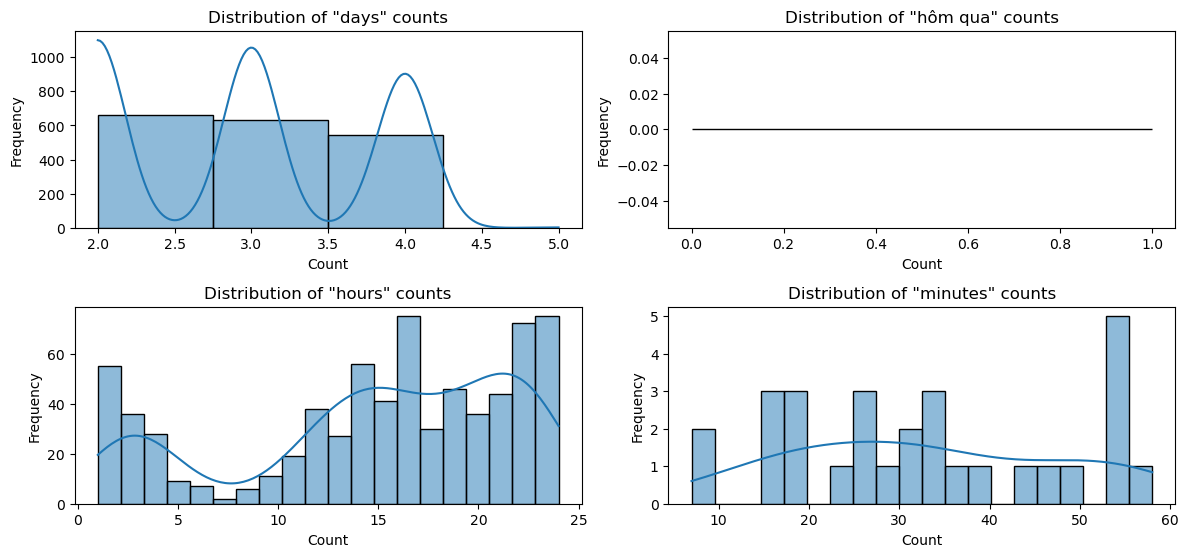

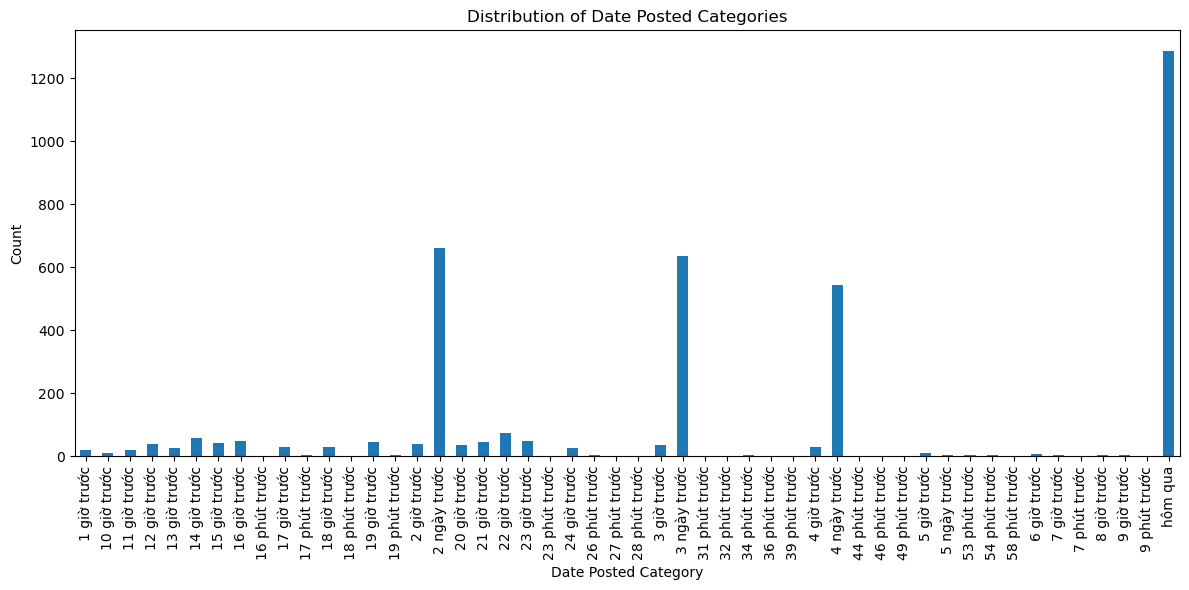


Average price by time period:
time_unit
days      19.61
hôm qua   19.42
hours     11.63
minutes    7.43
Name: numeric_price, dtype: float64


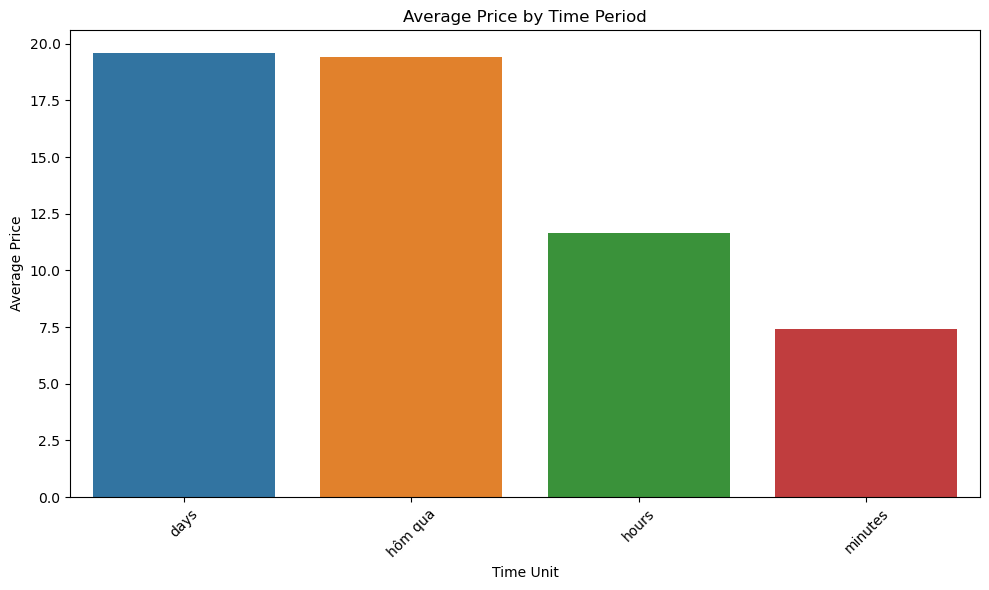


Properties posted within hours (713 listings):
                                                Title   date_posted  \
40  View Hai Con Rồng Hồ Tây – giá "con ong" 🐝 Chủ...  24 giờ trước   
41  Nhà lô góc Phú lương 33m-5T full đồ để lại nội...  24 giờ trước   
42  Bán nhà Mỹ Đình Trần Hữu Dực 60m2 7T 20P Doanh...  24 giờ trước   
43  Chính chủ bán nhà Đình Thôn 40m2 5T xây mới ng...  24 giờ trước   
44  Bán nhà Mỹ Đình 36m2 5 Tầng 80m đường Ô tô trá...  24 giờ trước   
45  Bán nhà Đức Diễn Bắc Từ Liêm 40m2 5T 50m đường...  24 giờ trước   
46  Mặt phố Trần Phú HĐ 58m2, 5T , vỉa hè 5m giá c...  24 giờ trước   
47  Chính chủ bán nhà Thái Thịnh,vị trí vàng 71m2 ...  24 giờ trước   
48  Bán căn hộ Ecohome Phúc Lợi - Long Biên - 78m²...  24 giờ trước   
49  CHỈ 2 TỶ600TR NHẬN NGAY CĂN 2PN1VS DT 60M FULL...  24 giờ trước   

       district_name          property_type  
40       Quận Tây Hồ           Nhà ngõ, hẻm  
41      Quận Hà Đông              Hướng Nam  
42  Quận Nam Từ Liêm           N

In [129]:
# Explore date_posted field
print("\n--- Date Posted Analysis ---")

# 1. Check unique values and counts
print("\nMost common date_posted values:")
date_counts = df['date_posted'].value_counts().head(10)
print(date_counts)

# 2. Convert relative time descriptions to standard time periods
def categorize_time_period(date_str):
    if pd.isna(date_str):
        return None, None
    
    # Extract time units and counts using regex
    time_match = re.search(r'(\d+)\s+(giây|phút|giờ|ngày|tuần|tháng|năm)\s+trước', date_str)
    if not time_match:
        return date_str, None
    
    count = int(time_match.group(1))
    unit = time_match.group(2)
    
    # Map Vietnamese time units to English
    unit_mapping = {
        'giây': 'seconds',
        'phút': 'minutes',
        'giờ': 'hours',
        'ngày': 'days',
        'tuần': 'weeks',
        'tháng': 'months',
        'năm': 'years'
    }
    
    return unit_mapping.get(unit, unit), count

# Apply the function to extract time units and counts
df['time_unit'], df['time_count'] = zip(*df['date_posted'].apply(categorize_time_period))

# 3. Analyze distribution of time units
print("\nDistribution of time units:")
time_unit_counts = df['time_unit'].value_counts()
print(time_unit_counts)

# 4. Check for potential outliers in the time counts
if 'time_count' in df.columns and df['time_count'].notna().any():
    print("\nTime Count Statistics:")
    print(df['time_count'].describe())
    
    # Visualize distribution of time counts by unit
    plt.figure(figsize=(12, 8))
    
    # Create subplots for each time unit
    time_units = df['time_unit'].unique()
    time_units = [unit for unit in time_units if pd.notna(unit)]
    
    subplot_rows = min(len(time_units), 3)
    subplot_cols = (len(time_units) + subplot_rows - 1) // subplot_rows
    
    for i, unit in enumerate(time_units, 1):
        unit_counts = df[df['time_unit'] == unit]['time_count']
        
        plt.subplot(subplot_rows, subplot_cols, i)
        if len(unit_counts) > 1:  # Only plot if there's more than one value
            sns.histplot(unit_counts, kde=True, bins=min(20, len(unit_counts.unique())))
        else:
            plt.text(0.5, 0.5, f"Only one value: {unit_counts.iloc[0]}", 
                     ha='center', va='center', fontsize=12)
        plt.title(f'Distribution of "{unit}" counts')
        plt.xlabel('Count')
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

    # 5. Identify potential outliers using IQR method
    for unit in time_units:
        unit_counts = df[df['time_unit'] == unit]['time_count']
        if len(unit_counts) > 10:  # Only check if we have enough data
            Q1 = unit_counts.quantile(0.25)
            Q3 = unit_counts.quantile(0.75)
            IQR = Q3 - Q1
            outlier_low = Q1 - 1.5 * IQR
            outlier_high = Q3 + 1.5 * IQR
            
            outliers = unit_counts[(unit_counts < outlier_low) | (unit_counts > outlier_high)]
            if len(outliers) > 0:
                print(f"\nPotential outliers for '{unit}':")
                print(f"  Lower threshold: {outlier_low}, Upper threshold: {outlier_high}")
                print(f"  Outlier counts: {outliers.value_counts().to_dict()}")
                print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(unit_counts)*100:.2f}% of {unit} entries)")

# 6. Create a histogram of date_posted categories
plt.figure(figsize=(12, 6))
df['date_posted'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Date Posted Categories')
plt.xlabel('Date Posted Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 7. Compare property characteristics by date_posted
if 'time_unit' in df.columns:
    print("\nAverage price by time period:")
    try:
        # Check if we can extract price in numeric form
        price_pattern = r'(\d+[,\.]?\d*)\s*(tỷ|triệu)'
        df['numeric_price'] = df['Price'].str.extract(price_pattern).iloc[:, 0].str.replace(',', '.').astype(float)
        
        avg_price_by_time = df.groupby('time_unit')['numeric_price'].mean().sort_values(ascending=False)
        print(avg_price_by_time)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x=avg_price_by_time.index, y=avg_price_by_time.values)
        plt.title('Average Price by Time Period')
        plt.xlabel('Time Unit')
        plt.ylabel('Average Price')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    except:
        print("Could not analyze price by time period")

# 8. Analyze most recently posted listings
most_recent = df[df['time_unit'] == 'hours']
if len(most_recent) > 0:
    print(f"\nProperties posted within hours ({len(most_recent)} listings):")
    print(most_recent[['Title', 'date_posted', 'district_name', 'property_type']].head(10))

# 9. Analyze oldest listings
oldest_unit_order = {'years': 1, 'months': 2, 'weeks': 3, 'days': 4, 'hours': 5, 'minutes': 6, 'seconds': 7}
if 'time_unit' in df.columns and df['time_unit'].notna().any():
    df['time_unit_order'] = df['time_unit'].map(oldest_unit_order)
    oldest = df.sort_values(['time_unit_order', 'time_count'], ascending=[True, False])
    print(f"\nOldest listings:")
    print(oldest[['Title', 'date_posted', 'district_name', 'property_type']].head(10))
    
    # Clean up
    df.drop('time_unit_order', axis=1, inplace=True)

## Retain the needed field

In [130]:
df = df[['Price', 'Price per m²', 'Space', 'Title', 'bedrooms', 'property_type', 'district_name']]

In [131]:
df.head()

,Price,Price per m²,Space,Title,bedrooms,property_type,district_name
0,"13,9 tỷ",278 tr/m²,50 m²,LÊ TRỌNG TẤN_THANH XUÂN_50M_5 TẦG PHÂN LÔ_LÔ G...,6.00,"Nhà ngõ, hẻm",Quận Thanh Xuân
1,"13,9 tỷ",278 tr/m²,50 m²,BÁN NHÀ THANH LÂN – NHÀ ĐẸP 5 TẦN5 – NGÕ NÔNG ...,3.00,"Nhà ngõ, hẻm",Quận Hoàng Mai
2,"13,9 tỷ",278 tr/m²,50 m²,BÁN NHANH CĂN 1N +GIÁ 2.250 TR FULL NỘI THẤT T...,1.00,Chung cư,Huyện Gia Lâm
3,"13,9 tỷ",278 tr/m²,50 m²,CHDV MỄ TRÌ_62M2_7T TM_17P KK_DÒNG TIỀN 95TR/T...,10.00,"Nhà ngõ, hẻm",Quận Nam Từ Liêm
4,"13,9 tỷ",278 tr/m²,50 m²,MỸ ĐÌNH_DÂN XÂY_39M 4T_50M Ô TÔ_2 THOÁNG_ GẦN ...,4.00,"Nhà ngõ, hẻm",Quận Nam Từ Liêm


## Unit explore

### Units for Price, Price/m2, Space

In [132]:
# Explore price, price per m², and space fields for unit patterns
print("=== Unit Exploration ===")

# Sample of original values
print("\nOriginal Values (sample):")
print("Price examples:", df['Price'].head().tolist())
print("Price per m² examples:", df['Price per m²'].head().tolist())
print("Space examples:", df['Space'].head().tolist())

# Check unique units in Price field
price_units = []
for price in df['Price'].dropna().unique():
    if isinstance(price, str):
        unit_match = re.search(r'[^\d,.]+$', price.strip())
        if unit_match:
            unit = unit_match.group().strip()
            if unit not in price_units:
                price_units.append(unit)

print("\nUnique units found in Price field:", price_units)

# Check unique units in Price per m² field
price_per_m2_units = []
for price in df['Price per m²'].dropna().unique():
    if isinstance(price, str):
        unit_match = re.search(r'[^\d,.]+$', price.strip())
        if unit_match:
            unit = unit_match.group().strip()
            if unit not in price_per_m2_units:
                price_per_m2_units.append(unit)

print("Unique units found in Price per m² field:", price_per_m2_units)

# Check unique units in Space field
space_units = []
for space in df['Space'].dropna().unique():
    if isinstance(space, str):
        unit_match = re.search(r'[^\d,.]+$', space.strip())
        if unit_match:
            unit = unit_match.group().strip()
            if unit not in space_units:
                space_units.append(unit)

print("Unique units found in Space field:", space_units)

=== Unit Exploration ===

Original Values (sample):
Price examples: ['13,9 tỷ', '13,9 tỷ', '13,9 tỷ', '13,9 tỷ', '13,9 tỷ']
Price per m² examples: ['278 tr/m²', '278 tr/m²', '278 tr/m²', '278 tr/m²', '278 tr/m²']
Space examples: ['50 m²', '50 m²', '50 m²', '50 m²', '50 m²']

Unique units found in Price field: ['tỷ', 'triệu']
Unique units found in Price per m² field: ['tr/m²']
Unique units found in Space field: ['m²']


### Extract the unit out

In [133]:
# Create numeric conversion functions
def extract_numeric_price(price_str):
    """
    Extract numeric price value and convert to billions VND
    """
    if pd.isna(price_str):
        return np.nan
    
    price_str = str(price_str).strip()
    
    # Extract numeric part and handle Vietnamese number format
    numeric_match = re.search(r'([\d,.]+)', price_str)
    if not numeric_match:
        return np.nan
    
    # Convert to float, handling comma as decimal separator if needed
    numeric_value = numeric_match.group(1).replace(',', '.')
    try:
        value = float(numeric_value)
    except ValueError:
        return np.nan
    
    # Convert based on unit
    if 'tỷ' in price_str:
        # Convert to millions
        return value * 1000.0
    elif 'triệu' in price_str or 'tr' in price_str:
        # Alr in millions
        return value 
    else:
        # Assume already in mil
        return value

def extract_numeric_price_per_m2(price_str):
    """
    Extract numeric price per m² value and convert to millions VND/m²
    """
    if pd.isna(price_str):
        return np.nan
    
    price_str = str(price_str).strip()
    
    # Extract numeric part
    numeric_match = re.search(r'([\d,.]+)', price_str)
    if not numeric_match:
        return np.nan
    
    # Convert to float, handling comma as decimal separator if needed
    numeric_value = numeric_match.group(1).replace(',', '.')
    try:
        value = float(numeric_value)
    except ValueError:
        return np.nan
    
    # Handle units - tr/m² is already in millions per m²
    if 'tr/m²' in price_str or 'tr/m2' in price_str or 'triệu/m²' in price_str:
        return value
    elif 'tỷ/m²' in price_str:
        # Convert billions/m² to millions/m²
        return value * 1000.0
    else:
        # Assume already in millions/m² if no unit is found
        return value

def extract_numeric_space(space_str):
    """
    Extract numeric space value in m²
    """
    if pd.isna(space_str):
        return np.nan
    
    space_str = str(space_str).strip()
    
    # Extract numeric part
    numeric_match = re.search(r'([\d,.]+)', space_str)
    if not numeric_match:
        return np.nan
    
    # Convert to float, handling comma as decimal separator if needed
    numeric_value = numeric_match.group(1).replace(',', '.')
    try:
        value = float(numeric_value)
    except ValueError:
        return np.nan
    
    # Handle units
    if 'm²' in space_str or 'm2' in space_str:
        return value
    elif 'ha' in space_str:
        # Convert hectares to m²
        return value * 10000.0
    else:
        # Assume already in m² if no unit is found
        return value

# Apply conversions
df['price_numeric'] = df['Price'].apply(extract_numeric_price)
df['price_per_m2'] = df['Price per m²'].apply(extract_numeric_price_per_m2)
df['area'] = df['Space'].apply(extract_numeric_space)

# Display results
print("\n=== Conversion Results ===")
print("\nSample of converted values:")
comparison_df = pd.DataFrame({
    'Original Price': df['Price'].head(10),
    'Price (millions VND)': df['price_numeric'].head(10),
    'Original Price per m²': df['Price per m²'].head(10),
    'Price per m² (millions VND)': df['price_per_m2'].head(10),
    'Original Space': df['Space'].head(10),
    'Space (m²)': df['area'].head(10)
})
print(comparison_df)

# Check summary statistics for numeric fields
print("\nSummary statistics for converted numeric fields:")
print("\nPrice (millions VND):")
print(df['price_numeric'].describe())
print("\nPrice per m² (millions VND):")
print(df['price_per_m2'].describe())
print("\nSpace (m²):")
print(df['area'].describe())

# Check for potential conversion errors (where original has a value but numeric is NaN)
print("\nPossible conversion errors for Price:")
price_errors = df[(df['Price'].notna()) & (df['price_numeric'].isna())]
if not price_errors.empty:
    print(price_errors[['Price', 'Title']].head())
else:
    print("None found")

print("\nPossible conversion errors for Price per m²:")
price_per_m2_errors = df[(df['Price per m²'].notna()) & (df['price_per_m2'].isna())]
if not price_per_m2_errors.empty:
    print(price_per_m2_errors[['Price per m²', 'Title']].head())
else:
    print("None found")

print("\nPossible conversion errors for Space:")
space_errors = df[(df['Space'].notna()) & (df['area'].isna())]
if not space_errors.empty:
    print(space_errors[['Space', 'Title']].head())
else:
    print("None found")

# Create a clean dataframe with the processed fields
df_clean = df.copy()
df_clean['Price'] = df['price_numeric']
df_clean['Price per m²'] = df['price_per_m2'] 
df_clean['Space'] = df['area']

# Drop the temporary columns
df_clean.drop(['price_numeric', 'price_per_m2', 'area'], axis=1, inplace=True)

print("\n=== Clean DataFrame ===")
print(df_clean.head())


=== Conversion Results ===

Sample of converted values:
  Original Price  Price (millions VND) Original Price per m²  \
0        13,9 tỷ              13900.00             278 tr/m²   
1        13,9 tỷ              13900.00             278 tr/m²   
2        13,9 tỷ              13900.00             278 tr/m²   
3        13,9 tỷ              13900.00             278 tr/m²   
4        13,9 tỷ              13900.00             278 tr/m²   
5        13,9 tỷ              13900.00             278 tr/m²   
6        13,9 tỷ              13900.00             278 tr/m²   
7        13,9 tỷ              13900.00             278 tr/m²   
8        13,9 tỷ              13900.00             278 tr/m²   
9        13,9 tỷ              13900.00             278 tr/m²   

   Price per m² (millions VND) Original Space  Space (m²)  
0                       278.00          50 m²       50.00  
1                       278.00          50 m²       50.00  
2                       278.00          50 m²       50.00 

## Check distribution Price per m2 and Outliers

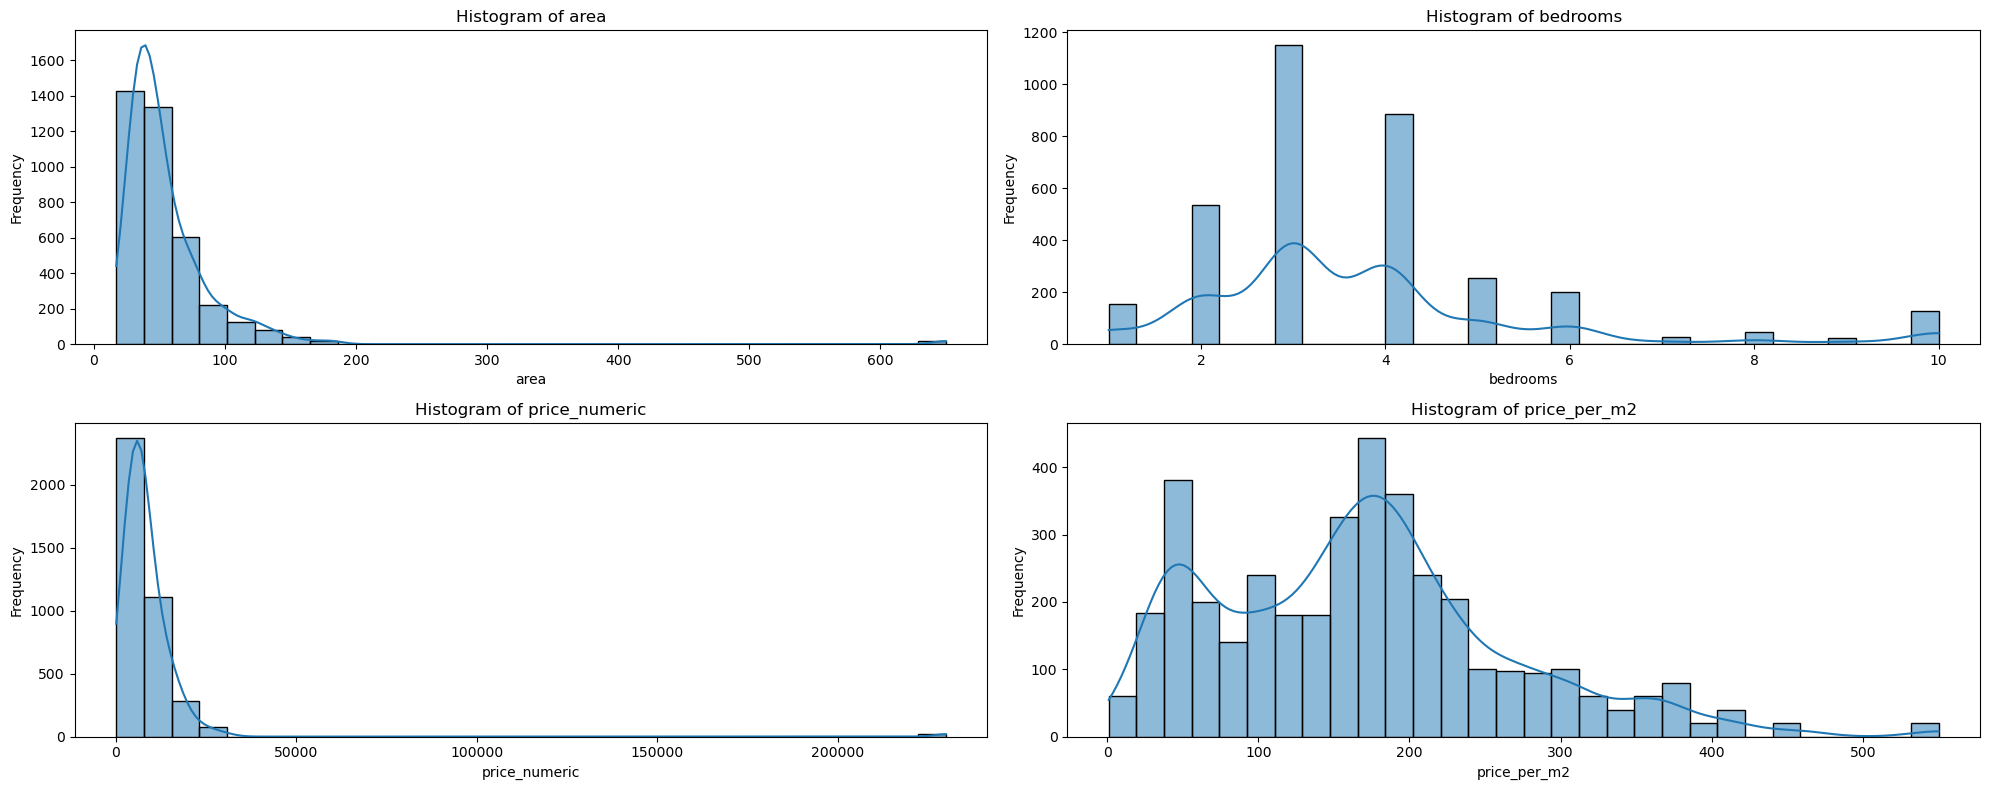

,bedrooms,price_numeric,price_per_m2,area
count,3405.00,3871.00,3871.00,3871.00
mean,3.74,8979.24,167.46,56.83
std,1.85,16709.56,98.20,51.20
min,1.00,115.00,1.10,17.00
25%,3.00,4500.00,95.00,34.00
50%,3.00,6800.00,168.00,45.00
75%,4.00,9900.00,217.00,65.00
max,10.00,230000.00,550.00,650.00


In [134]:
# Plot histograms for all numeric columns to check distributions and outliers

# Select only numeric columns for histograms
numeric_cols = ['area', 'bedrooms', 'price_numeric', 'price_per_m2']

# Determine the layout for subplots
n_cols = 2  # Number of columns in subplot grid
n_rows = (len(numeric_cols) - 1) // n_cols + 1 # Calculate rows needed

plt.figure(figsize=(20, n_rows * 4)) # Adjust figure size based on number of rows

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

df.describe()

In [135]:
df.head()

,Price,Price per m²,Space,Title,bedrooms,property_type,district_name,price_numeric,price_per_m2,area
0,"13,9 tỷ",278 tr/m²,50 m²,LÊ TRỌNG TẤN_THANH XUÂN_50M_5 TẦG PHÂN LÔ_LÔ G...,6.00,"Nhà ngõ, hẻm",Quận Thanh Xuân,13900.00,278.00,50.00
1,"13,9 tỷ",278 tr/m²,50 m²,BÁN NHÀ THANH LÂN – NHÀ ĐẸP 5 TẦN5 – NGÕ NÔNG ...,3.00,"Nhà ngõ, hẻm",Quận Hoàng Mai,13900.00,278.00,50.00
2,"13,9 tỷ",278 tr/m²,50 m²,BÁN NHANH CĂN 1N +GIÁ 2.250 TR FULL NỘI THẤT T...,1.00,Chung cư,Huyện Gia Lâm,13900.00,278.00,50.00
3,"13,9 tỷ",278 tr/m²,50 m²,CHDV MỄ TRÌ_62M2_7T TM_17P KK_DÒNG TIỀN 95TR/T...,10.00,"Nhà ngõ, hẻm",Quận Nam Từ Liêm,13900.00,278.00,50.00
4,"13,9 tỷ",278 tr/m²,50 m²,MỸ ĐÌNH_DÂN XÂY_39M 4T_50M Ô TÔ_2 THOÁNG_ GẦN ...,4.00,"Nhà ngõ, hẻm",Quận Nam Từ Liêm,13900.00,278.00,50.00


### Convert property type and district name to categorical code

In [136]:
# Convert address components to categorical codes for modeling/correlation
df['property_cat'] = df['property_type'].astype('category').cat.codes
df['district_cat'] = df['district_name'].astype('category').cat.codes
df.head()

,Price,Price per m²,Space,Title,bedrooms,property_type,district_name,price_numeric,price_per_m2,area,property_cat,district_cat
0,"13,9 tỷ",278 tr/m²,50 m²,LÊ TRỌNG TẤN_THANH XUÂN_50M_5 TẦG PHÂN LÔ_LÔ G...,6.00,"Nhà ngõ, hẻm",Quận Thanh Xuân,13900.00,278.00,50.00,68,25
1,"13,9 tỷ",278 tr/m²,50 m²,BÁN NHÀ THANH LÂN – NHÀ ĐẸP 5 TẦN5 – NGÕ NÔNG ...,3.00,"Nhà ngõ, hẻm",Quận Hoàng Mai,13900.00,278.00,50.00,68,21
2,"13,9 tỷ",278 tr/m²,50 m²,BÁN NHANH CĂN 1N +GIÁ 2.250 TR FULL NỘI THẤT T...,1.00,Chung cư,Huyện Gia Lâm,13900.00,278.00,50.00,0,2
3,"13,9 tỷ",278 tr/m²,50 m²,CHDV MỄ TRÌ_62M2_7T TM_17P KK_DÒNG TIỀN 95TR/T...,10.00,"Nhà ngõ, hẻm",Quận Nam Từ Liêm,13900.00,278.00,50.00,68,24
4,"13,9 tỷ",278 tr/m²,50 m²,MỸ ĐÌNH_DÂN XÂY_39M 4T_50M Ô TÔ_2 THOÁNG_ GẦN ...,4.00,"Nhà ngõ, hẻm",Quận Nam Từ Liêm,13900.00,278.00,50.00,68,24


### Handle possible Outliers

In [137]:
# Use IQR method to filter extreme values
def remove_outliers(df, columns, multiplier=1.5):
    """Remove outliers from specified columns using IQR method"""
    df_filtered = df.copy()
    for col in columns:
        if col in df.columns and df[col].dtype in ['int64', 'float64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - multiplier * IQR
            upper_bound = Q3 + multiplier * IQR
            df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & 
                                      (df_filtered[col] <= upper_bound)]
    return df_filtered

# Remove outliers from numeric fields for better correlation
numeric_cols = ['price_numeric', 'price_per_m2', 'area', 'bedrooms']
df_no_outliers = remove_outliers(df, numeric_cols)
print(f"\nOriginal dataframe: {len(df)} rows")
print(f"After removing outliers: {len(df_no_outliers)} rows")



Original dataframe: 3871 rows
After removing outliers: 2467 rows


In [138]:
print("\nSummary statistics after outlier removal:")
print(df_no_outliers[numeric_cols].describe())


Summary statistics after outlier removal:
       price_numeric  price_per_m2    area  bedrooms
count        2467.00       2467.00 2467.00   2467.00
mean         6851.15        161.18   47.06      3.30
std          3647.80         83.30   17.87      0.87
min           115.00          1.10   17.00      2.00
25%          4420.00         99.00   33.00      3.00
50%          6200.00        167.00   42.00      3.00
75%          8300.00        211.00   57.00      4.00
max         17900.00        397.00  105.00      5.00


### Histogram after removal

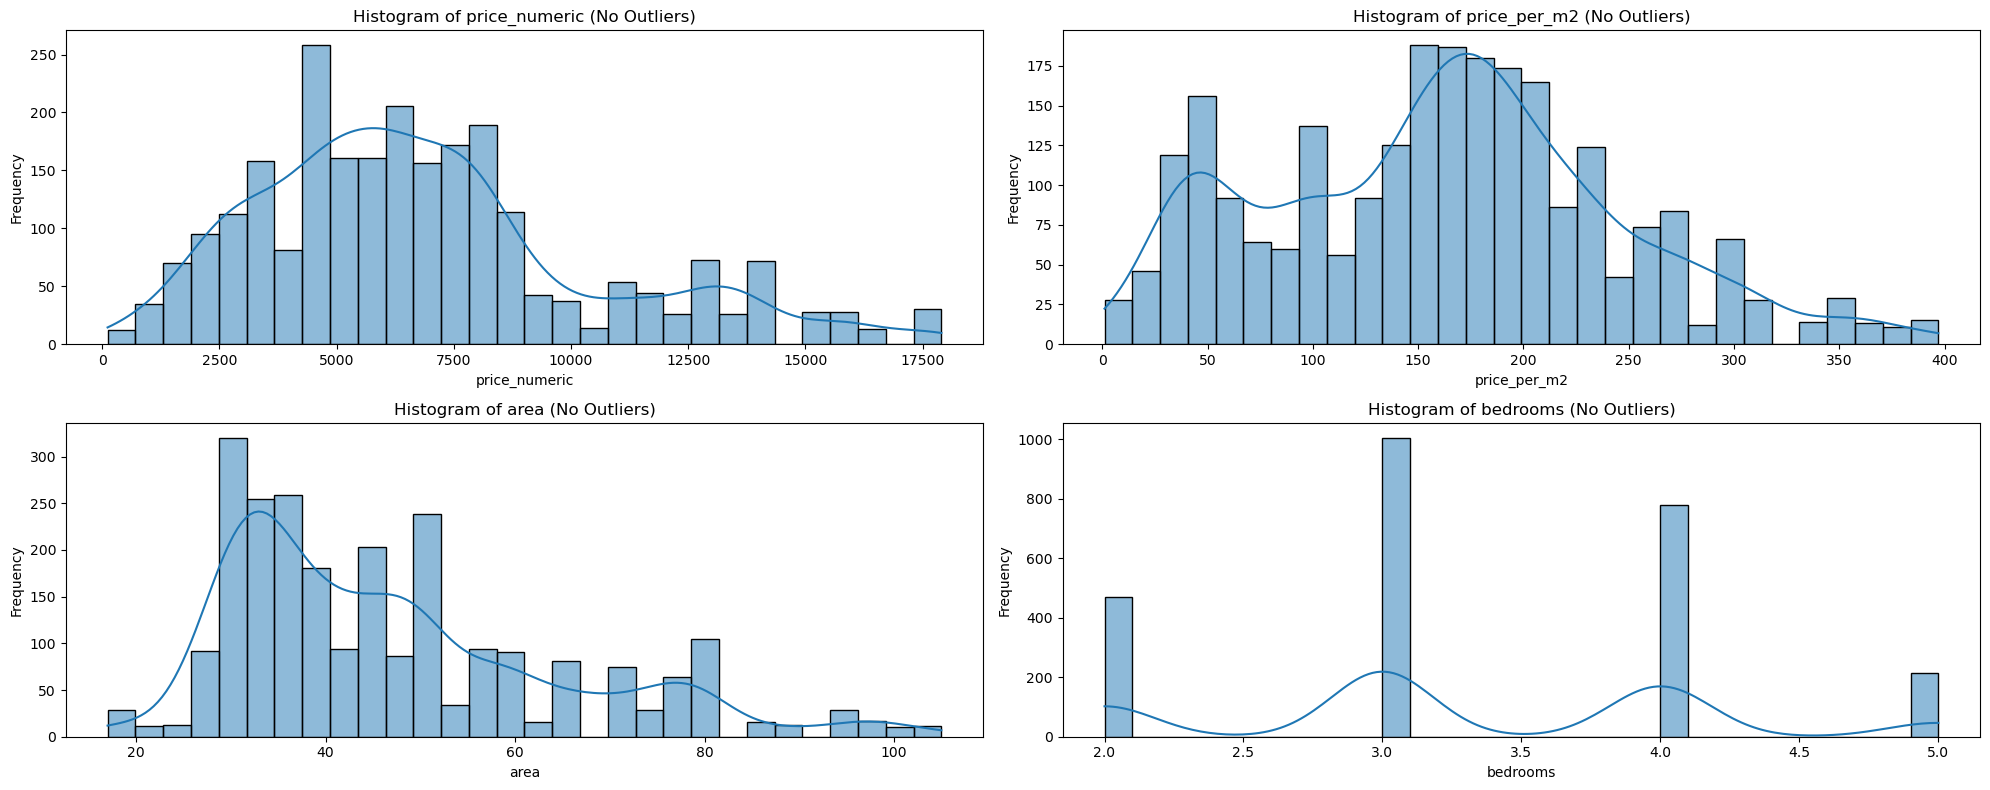

In [139]:
# Plot histograms for the columns after outlier removal
plt.figure(figsize=(20, n_rows * 4)) # n_rows and n_cols are defined in the previous histogram cell

for i, col in enumerate(numeric_cols): # Use the same outlier_columns list
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df_no_outliers[col], kde=True, bins=30)
    plt.title(f'Histogram of {col} (No Outliers)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Correlation with price per m2


Correlation with price_per_m2:
               price_per_m2
price_per_m2           1.00
price_numeric          0.82
district_cat           0.07
bedrooms               0.06
property_cat           0.05


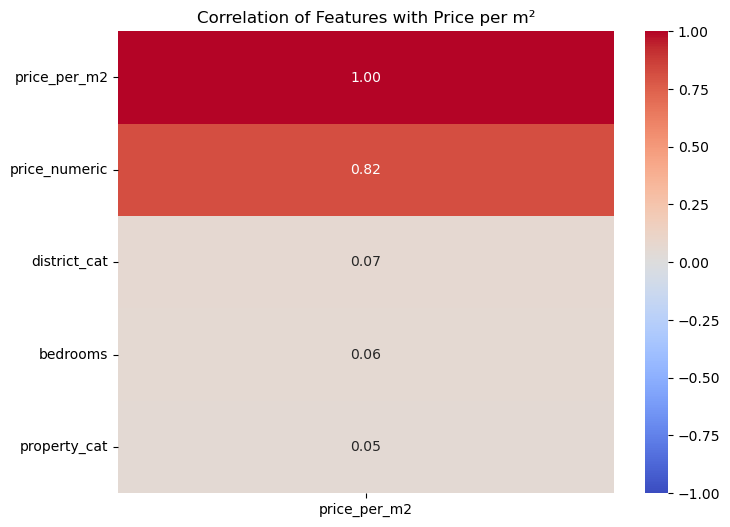

In [140]:
# Calculate correlation with price_per_m2
# Select relevant columns for correlation
# Exclude original price, address, non-encoded address parts, area, and price_converted
correlation_cols = ['bedrooms', 'price_numeric', 'property_cat', 'district_cat', 'price_per_m2']

# Ensure all selected columns are present in df_no_outliers
existing_correlation_cols = [col for col in correlation_cols if col in df_no_outliers.columns]

if not existing_correlation_cols or 'price_per_m2' not in existing_correlation_cols:
    print("Price_per_m2 or other critical columns for correlation are missing from df_no_outliers.")
else:
    correlation_matrix = df_no_outliers[existing_correlation_cols].corr()
    price_per_m2_corr = correlation_matrix[['price_per_m2']].sort_values(by='price_per_m2', ascending=False)

    print("\nCorrelation with price_per_m2:")
    print(price_per_m2_corr)

    # Plotting the correlation
    plt.figure(figsize=(8, 6))
    sns.heatmap(price_per_m2_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title('Correlation of Features with Price per m²')
    plt.show()

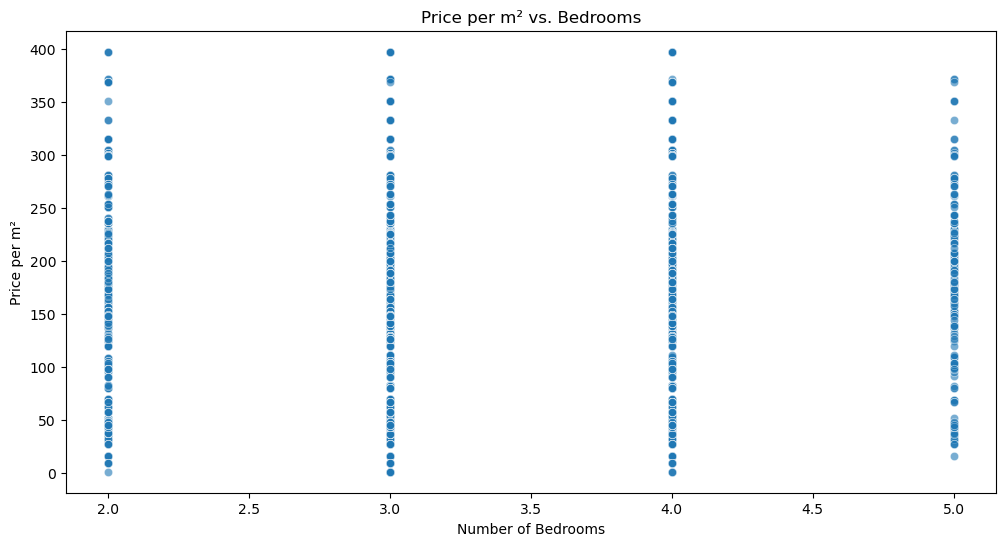

In [141]:
# Plot bedrooms against price_per_m2
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_no_outliers, x='bedrooms', y='price_per_m2', alpha=0.6)
plt.title('Price per m² vs. Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price per m²')
plt.show()

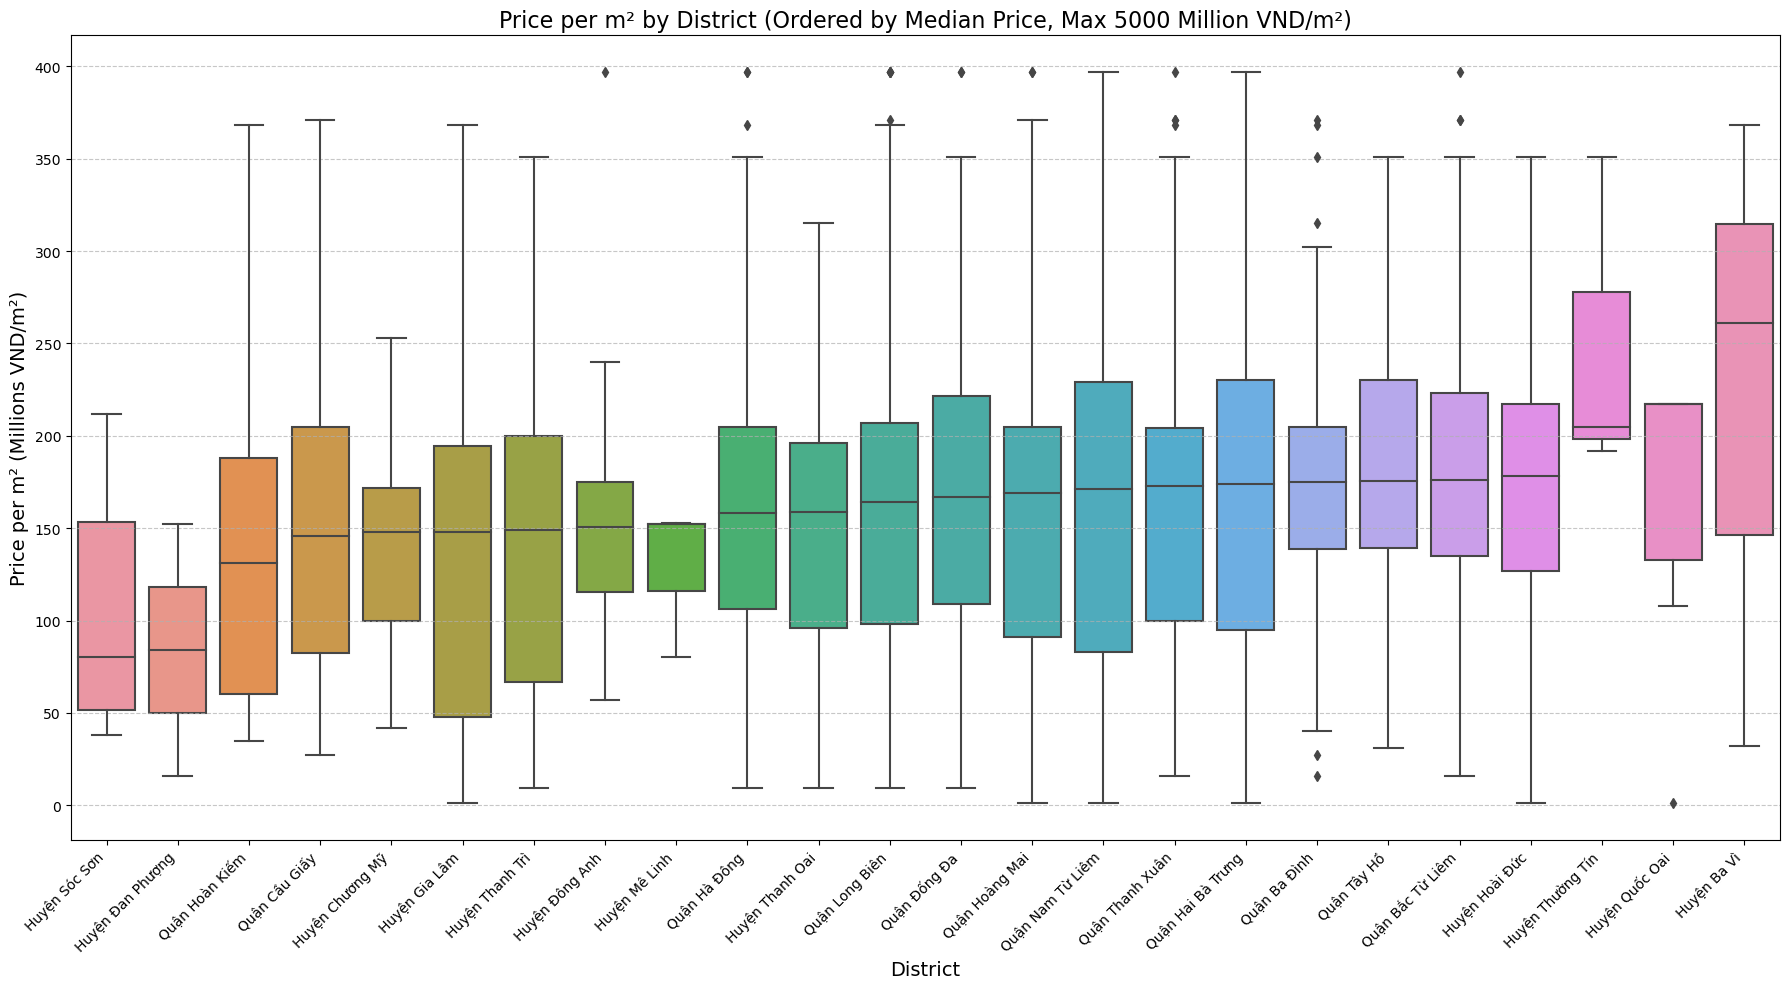

In [145]:
# Price per m² by district, limited to 5000 million VND

# Filter out outliers where price_per_m2 > 5000
df_filtered_price = df_no_outliers[df_no_outliers['price_per_m2'] <= 5000]

# Calculate the median price_per_m2 for each district to order them using the filtered data
if 'district_name' in df_filtered_price.columns and 'price_per_m2' in df_filtered_price.columns:
    median_prices = df_filtered_price.groupby('district_name')['price_per_m2'].median().sort_values()
    ordered_districts = median_prices.index

    plt.figure(figsize=(18, 10)) # Increased figure size for better readability
    sns.boxplot(data=df_filtered_price, x='district_name', y='price_per_m2', order=ordered_districts)
    plt.title('Price per m² by District (Ordered by Median Price, Max 5000 Million VND/m²)', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=10) # Adjusted rotation and alignment for better label visibility
    plt.xlabel('District', fontsize=14)
    plt.ylabel('Price per m² (Millions VND/m²)', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Added a light grid for the y-axis
    plt.tight_layout() # Adjust layout to prevent labels from overlapping    plt.show()
else:
    print("Columns 'district' or 'price_per_m2' not found in the filtered DataFrame, or the filtered DataFrame is empty.")
